In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv('heart.csv')

In [4]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [6]:
heart.shape

(303, 15)

In [8]:
heart.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [10]:
heart['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [11]:
heart.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [12]:
heart.dropna().describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.673401,54.542088,0.676768,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768
std,87.323283,9.049736,0.468500,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,75.000000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,150.000000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,226.000000,61.000000,1.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,302.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


Distribucion de Edades

In [16]:
heart['Age'].min(),heart['Age'].max(), heart['Age'].max()- heart['Age'].min()

(29, 77, 48)

In [32]:
r = ((heart['Age'].max()-heart['Age'].min())/2)+1
intervalos = list()
n=2

for i in range(int(r)):
    v=int(heart['Age'].min())+int(i)*n
    intervalos.append(v)

In [33]:
len(intervalos)-1

24

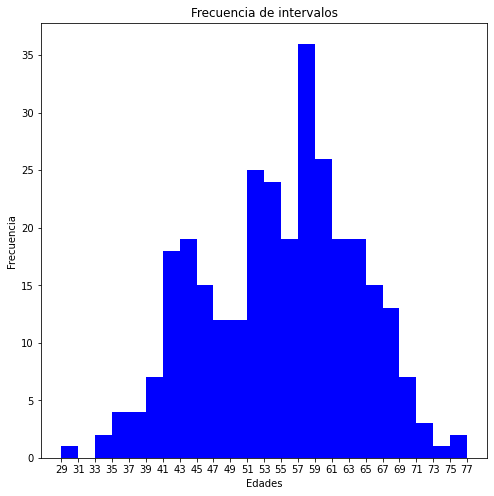

In [36]:
plt.figure(figsize=(8,8))
plt.hist(heart['Age'], bins=intervalos, color='blue')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de intervalos')
plt.xticks(intervalos)
plt.show()

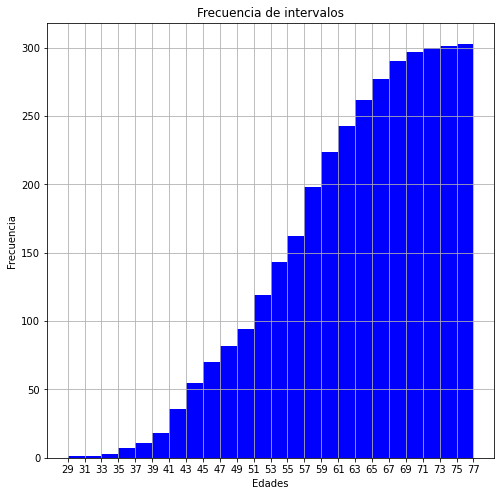

In [37]:
plt.figure(figsize=(8,8))
plt.hist(heart['Age'], bins = intervalos, color='blue',cumulative=True)
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de intervalos')
plt.xticks(intervalos)

plt.grid(True)
plt.show()

Distribucion por SEXOS

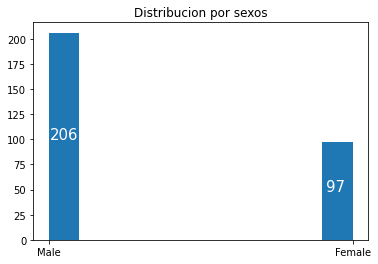

In [42]:
sex = heart['Sex'].copy()
males_count =sum(sex)
female_count =len(sex)-males_count

sex = sex.replace(1,'Male')
sex = sex.replace(0,'Female')

sex.hist()
plt.title('Distribucion por sexos')
plt.text(0.005, 100,males_count,color='white',fontsize=15)
plt.text(0.91, 48,female_count,color='white',fontsize=15)
plt.grid(False)
plt.show()

Colesterol en la sangre

In [43]:
heart[['Chol','Sex']].groupby('Sex').mean()

,Chol
Sex,
0,261.752577
1,239.601942


In [45]:
heart.pivot_table('Chol', index='Age', columns='Sex',aggfunc='mean')

Sex,0,1
Age,,
29,NaN,204.000000
34,210.000000,182.000000
35,183.000000,224.000000
37,215.000000,250.000000
38,NaN,203.000000
39,209.500000,270.000000
40,NaN,196.333333
41,244.000000,205.166667
42,237.000000,250.000000


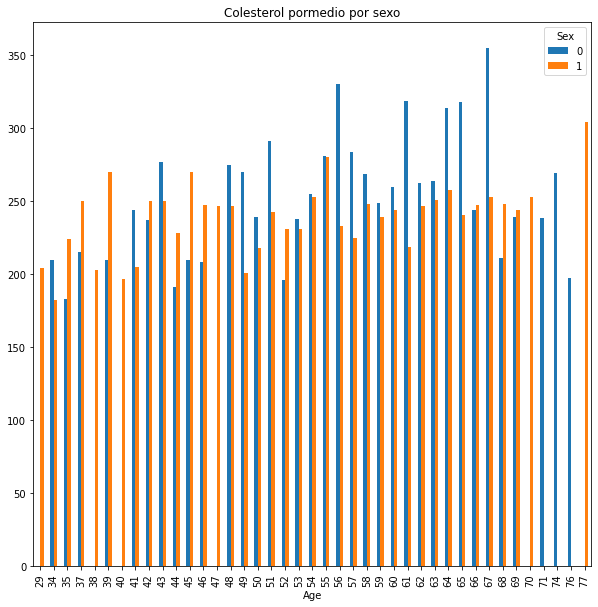

In [46]:
heart.pivot_table('Chol', index='Age', columns='Sex',aggfunc='mean').plot(kind='bar',figsize=(10,10))
plt.title('Colesterol pormedio por sexo')
plt.show()

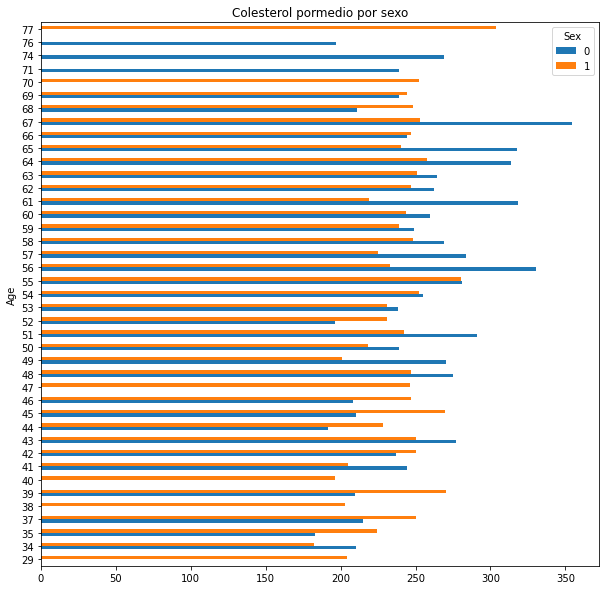

In [47]:
heart.pivot_table('Chol', index='Age', columns='Sex',aggfunc='mean').plot(kind='barh',figsize=(10,10))
plt.title('Colesterol pormedio por sexo')
plt.show()

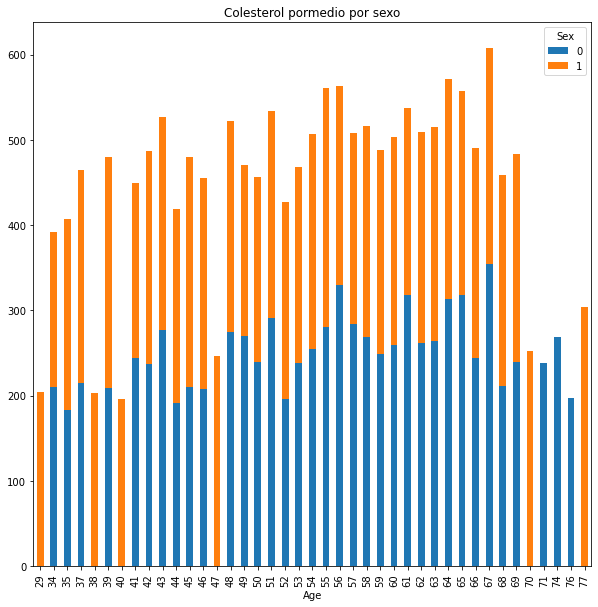

In [49]:
heart.pivot_table('Chol', index='Age', columns='Sex',aggfunc='mean').plot(kind='bar',figsize=(10,10), stacked=True)
plt.title('Colesterol pormedio por sexo')
plt.show()